#Projeto 2 - Predição de preços de casas
- Entrega:
 - O projeto deve ser entregue até a terça-feira da 3ª semana de aula, envie o link do GitHub ou HTML na atividade no Moodle.
 - O prazo máximo é quarta-feira da 3ª semana de aula, valendo 20% a menos da nota.

- Dados do Certificado
  - Linguagem: Python
  - Tecnologias: Pandas, Numpy, Seaborn, Matplotlib, Sklearn e LightGBM
  - Carga horária: 20 horas

**House Prices - Advanced Regression Techniques**
 - Peça a um comprador de imóveis para descrever a casa dos seus sonhos e eles provavelmente não começarão com a altura do teto do porão ou a proximidade de uma linha de trem. Mas este conjunto de dados prova que há muitos detalhes que influenciam as negociações de preços do que o número de quartos ou uma cerca branca.

**Sobre este projeto**
- Os principais pontos que serão avaliados:
  - Levantamento de hipóteses
  - Criação e seleção de características
  - Manipulação de dados e criação de gráficos simples com o Pandas
  - Criar um modelo de predição
  - Apresentação dos resultados

#Preparação do ambiente
- Para este projeto, acessem o link - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download. Descompacte o arquivo.

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.feature_selection import SelectKBest  
from sklearn.feature_selection import f_classif    
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.model_selection import KFold, StratifiedKFold   
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.shape

(1460, 81)

#Exercício
Neste projeto você deverá desenvolver a partir do que já vimos nos projetos anteriores, ou seja, poderá usar qualquer um dos modelos vistos durante as aulas. Siga este roteiro e preencha cada parte.

#1 Análise exploratória de dados
(1.0 ponto)
- Realize a análise exploratória de dados. Observe cada variável, como se comportam em relação a outras variáveis independentes e com a variável dependente.

Vamos começar olhando a relação entre todas as variáveis.

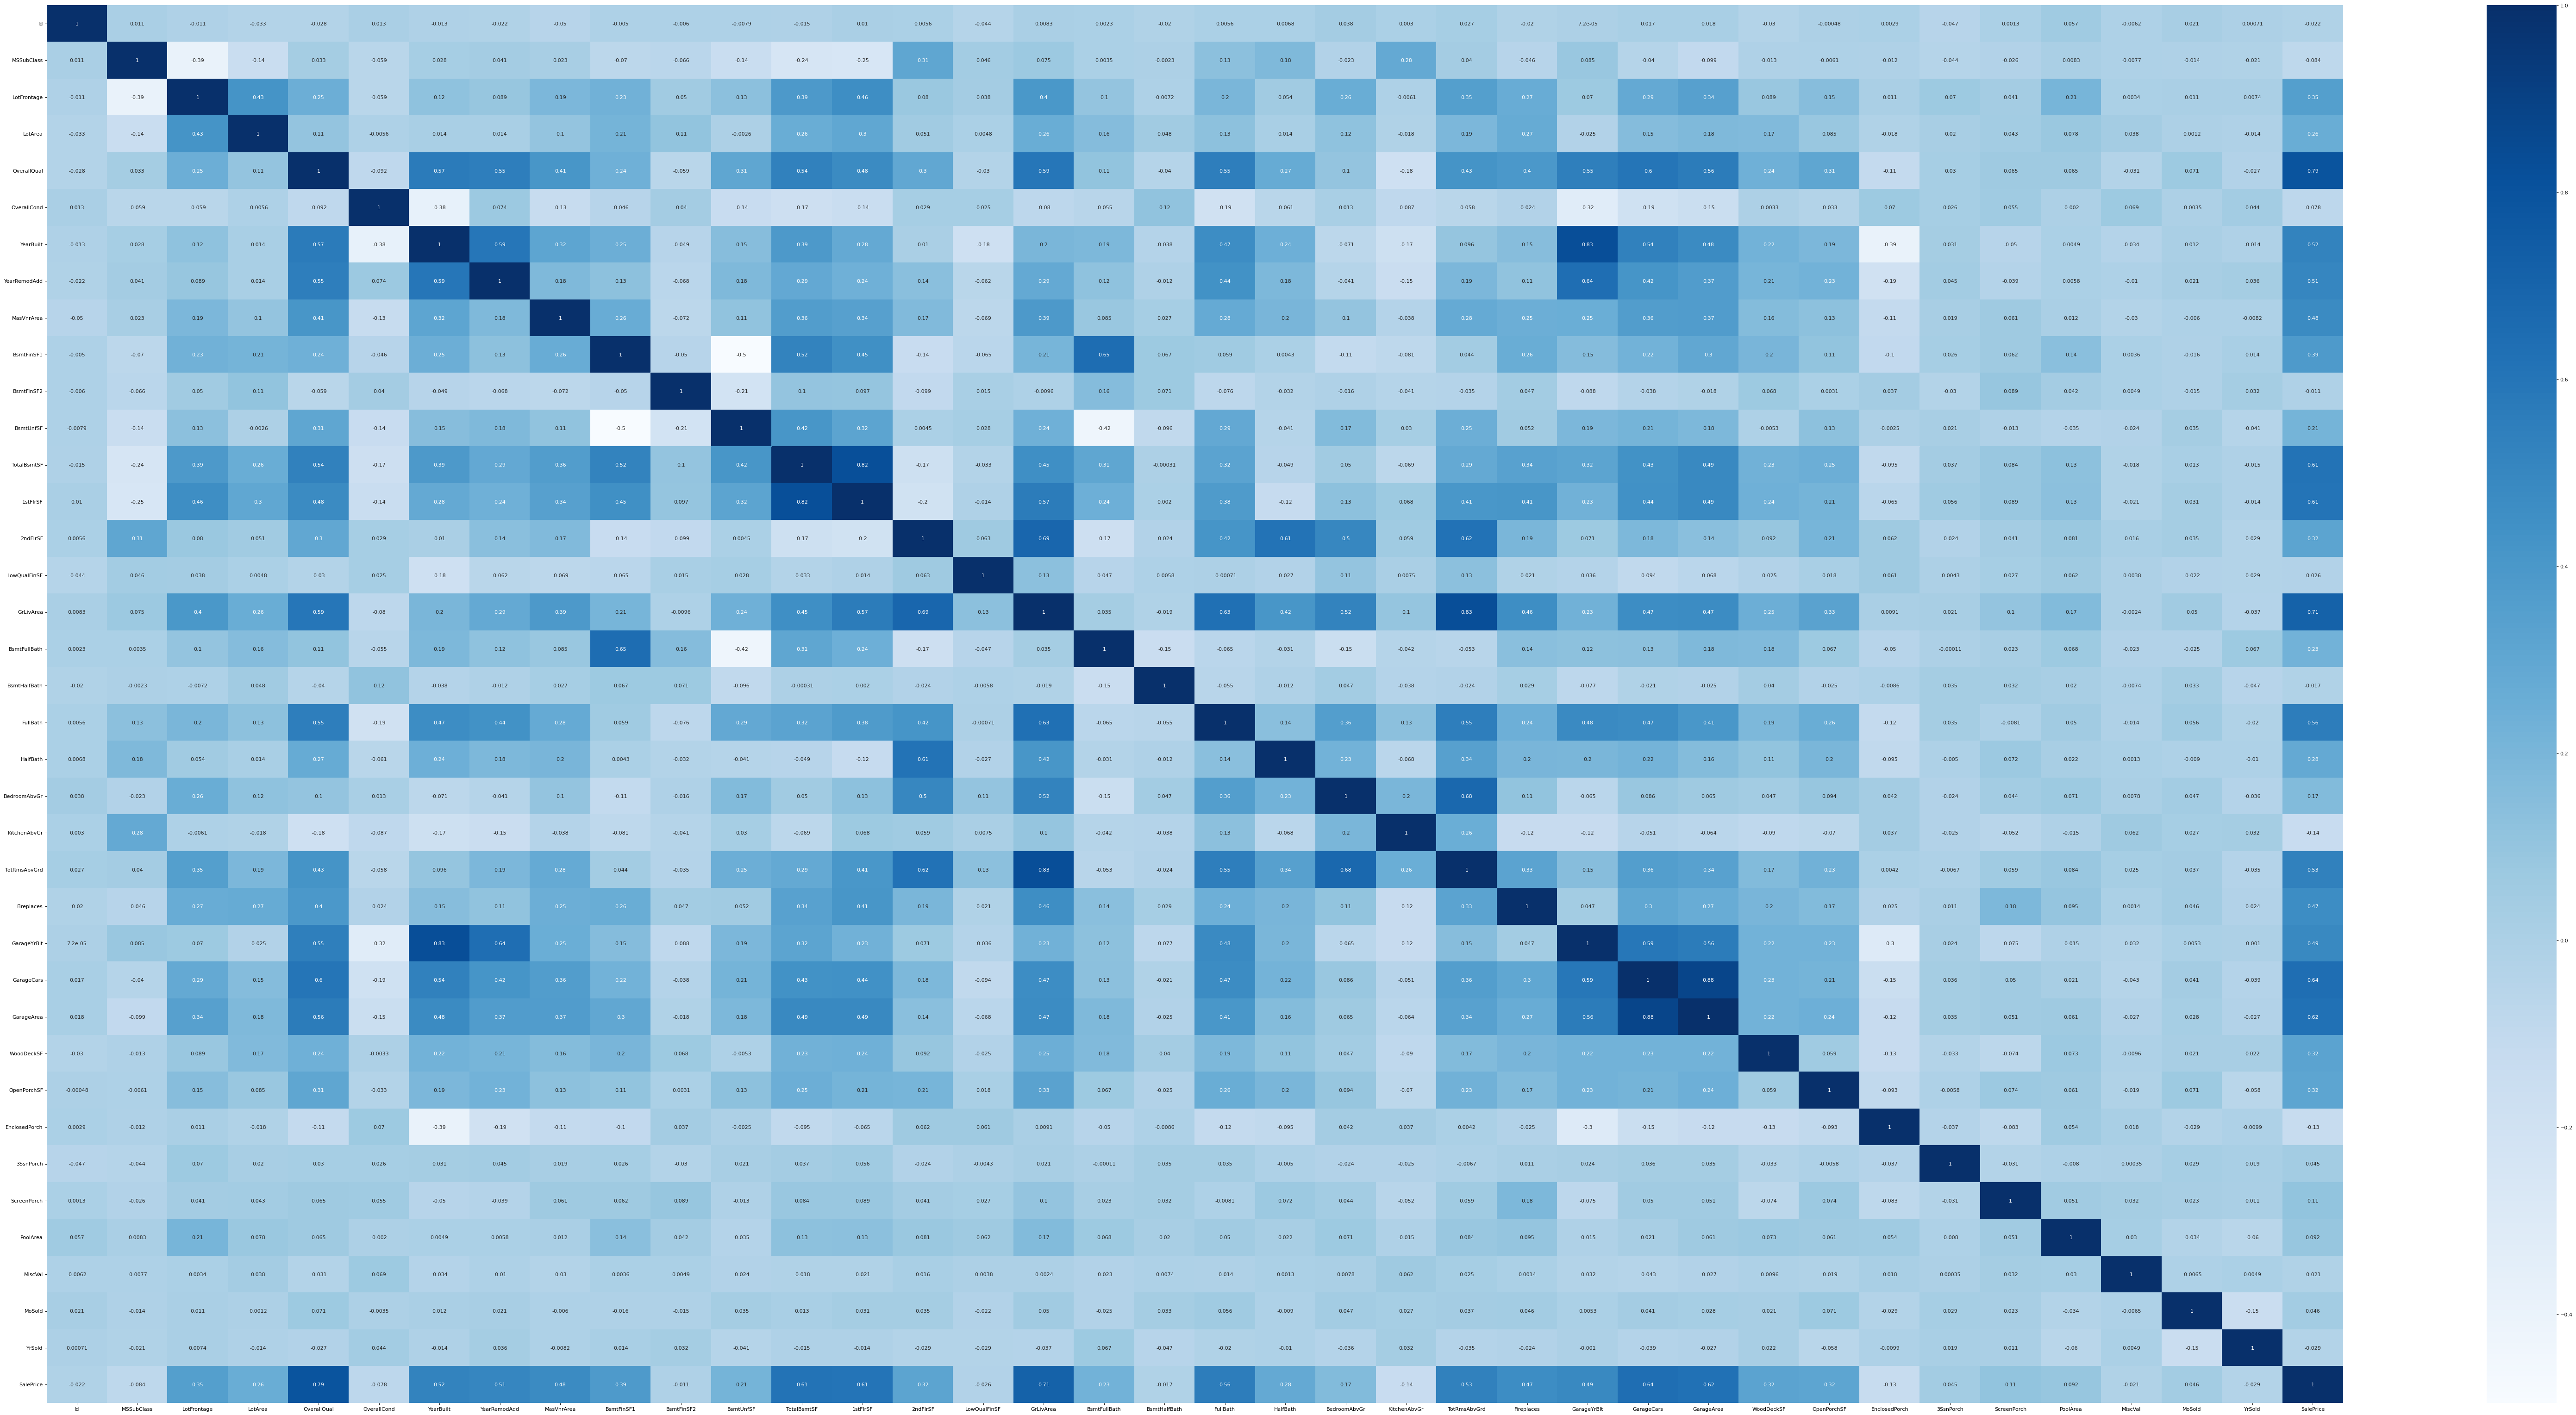

In [ ]:
plt.figure( figsize=( 100,50 ), dpi=80 )
sns.heatmap( df.corr(), cmap='Blues', annot=True )
plt.show()

- Interessante observar que a variável que mais se correlaciona com o SalePrice é  OverallQual, o que faz todo sentido, pois é a variável que classifica o material e o acabamento geral da casa.
- Outras variáveis interessantes de destacar são a GrLivArea, que mostra a área da casa em pés quadrados, e as 'GarageCars' e 'GarageArea', que conta número de vagas na garagem e o seu tamanho em pés quadrados.
- Tem outras variaveis interessantes também que poderemos ir entendendo melhor durante o projeto, mas o principal aqui é entender que estas possivelmente são as que mais impactarão no resultado final do nosso modelo.

#2 Levantamento de hipóteses
(1.0 ponto)
- Descreva quais hipóteses você observou ao fazer a análise exploratória de dados.

- Fica o questionamento, vale a pena tirar as variáveis que estão negativas em relação a nossa variável alvo, preço das casas? mais adiante vou fazer testes com diferentes datasets.
- Vão ser criadas bases de dados com todas as variáveis, só com as melhores e tirando alguma manualmente para ver como os modelos irão se comportar.
- As variáveis que serão tiradas manualmente: 'id', "MSSubClass','OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr','EnclosedPorch','MiscVal','YrSold'. São todas que ficaram negativas em relação ao 'SalePrice'.

Algumas outras análises vão ter que ser feitas depois, mais adiante, pois alguns código não aceitam strings, então teremos que transforma-las em valores numéricos

#3 Apresentação das ideias obtidas
(1.0 ponto)
- Apresente com gráficos as suas observações e a descreva cada gráfico.

Vamos fazer gráficos para ver a relação entre as principais variáveis com a nossa variável alvo.

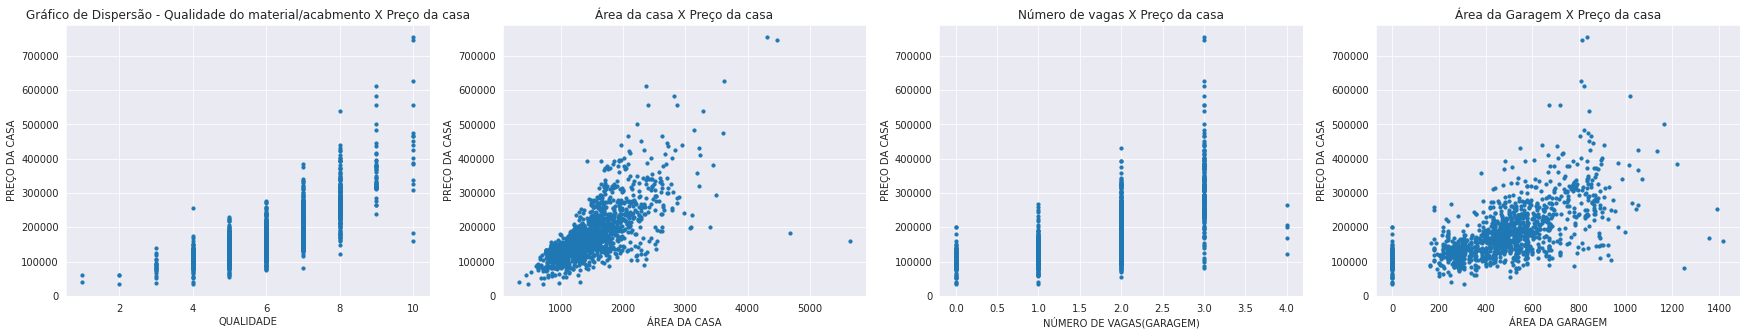

In [ ]:
plt.figure(figsize=(30,5))
sns.set_style('darkgrid')

plt.subplot(1, 4, 1)
plt.scatter(df['OverallQual'], df['SalePrice'],s=10)  
plt.title('Gráfico de Dispersão - Qualidade do material/acabmento X Preço da casa', fontsize=12)
plt.xlabel('Qualidade'.upper(), fontsize=10)
plt.ylabel('Preço da casa'.upper(), fontsize=10)
plt.grid(color='white')

plt.subplot(1, 4, 2)
plt.scatter(df['GrLivArea'], df['SalePrice'],s=10)  
plt.title('Área da casa X Preço da casa', fontsize=12)
plt.xlabel('Área da casa'.upper(), fontsize=10)
plt.ylabel('Preço da casa'.upper(), fontsize=10)
plt.grid(color='white')

plt.subplot(1, 4, 3)
plt.scatter(df['GarageCars'], df['SalePrice'],s=10)  
plt.title('Número de vagas X Preço da casa', fontsize=12)
plt.xlabel('Número de vagas(garagem)'.upper(), fontsize=10)
plt.ylabel('Preço da casa'.upper(), fontsize=10)
plt.grid(color='white')

plt.subplot(1, 4, 4)
plt.scatter(df['GarageArea'], df['SalePrice'],s=10)  
plt.title('Área da Garagem X Preço da casa', fontsize=12)
plt.xlabel('Área da Garagem'.upper(), fontsize=10)
plt.ylabel('Preço da casa'.upper(), fontsize=10)
plt.grid(color='white')
plt.show()

- Aqui, então, podemos ver a relação entre elas. Comprovamos os números visto no primeiro gráfico, que realmente há relação entre estas variáveis em questão.
- Aqui também conseguimos ver que não temos ouliers muito impactantes nessas variáveis.
- Falando em outliers, no andamento do projeto vamos fazer a retirada dos mesmos, os mais impactantes.

# 4 Preparação dos dados
 (1.0 ponto)
- Faça um processamento nos dados, preenchendo valores faltantes, removendo dados ou variáveis inconsistentes e normalizado os dados


- A ideia aqui é olhar o conteúdo das variáveis, ver os valores nulos, entender se é possível alterar alguns valores, excluir outros.

In [ ]:
def info_objects(coluna_dados):
  print(coluna_dados + ": ")
  print(df[coluna_dados].unique())
  print(df[coluna_dados].describe())
  display (df[df[coluna_dados].isnull()])

**Id**

In [ ]:
info_objects('Id')

Id: 
[   1    2    3 ... 1458 1459 1460]
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


- A partir dessas análises já será criada a base de dados que será usada no modelo, o mais padronizada possível, chamaremos de "X".
- Começaremos excluindo a coluna "Id".

In [ ]:
X = df.drop('Id',axis=1)

**MSSubClass**
- Identifica o tipo de habitação envolvida na venda.
      - 20	1-STORY 1946 & NEWER ALL STYLES
      - 30	1-STORY 1945 & OLDER
      - 40	1-STORY W/FINISHED ATTIC ALL AGES
      - 45	1-1/2 STORY - UNFINISHED ALL AGES
      - 50	1-1/2 STORY FINISHED ALL AGES
      - 60	2-STORY 1946 & NEWER
      - 70	2-STORY 1945 & OLDER
      - 75	2-1/2 STORY ALL AGES
      - 80	SPLIT OR MULTI-LEVEL
      - 85	SPLIT FOYER
      - 90	DUPLEX - ALL STYLES AND AGES
      - 120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
      - 150	1-1/2 STORY PUD - ALL AGES
      - 160	2-STORY PUD - 1946 & NEWER
      - 180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
      - 190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [ ]:
info_objects('MSSubClass')

MSSubClass: 
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
#Tranforma variávies em Dummies
def tranf_getdummies(coluna_dados):
  var_getdummies = X[coluna_dados]
  var_getdummies  = pd.get_dummies(var_getdummies)
  for i in range(len(X[coluna_dados].unique())):
    X[X[coluna_dados].unique()[i]] =  var_getdummies[X[coluna_dados].unique()[i]]

In [ ]:
#criando novas colunas dummies e excluindo a coluna original
tranf_getdummies('MSSubClass')
X = X.drop('MSSubClass',axis=1)

**MSZoning**
- Identifica a classificação geral da zona da venda
  - A	Agriculture
  - C	Commercial
  - FV	Floating Village Residential
  - I	Industrial
  - RH	Residential High Density
  - RL	Residential Low Density
  - RP	Residential Low Density Park 
  - RM	Residential Medium Density

In [ ]:
info_objects('MSZoning')

MSZoning: 
['RL' 'RM' 'C (all)' 'FV' 'RH']
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
#criando novas colunas dummies e excluindo a coluna original
tranf_getdummies('MSZoning')
X = X.drop('MSZoning',axis=1)

**LotFrontage**
- Distância em pés da rua à propriedade

In [ ]:
info_objects('LotFrontage')

LotFrontage: 
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


Analisando os dado da coluna "LotFrontage", percebemos que temos valores nulos, para não perder toda a linha vamos substituir o valores nulos pelo valor médio.

In [ ]:
X['LotFrontage'] = X['LotFrontage'].fillna(X['LotFrontage'].mean()) 
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean()) 

In [ ]:
info_objects('LotFrontage')

LotFrontage: 
[ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          72.          66.         101.
  57.          44.         110.          98.          47.
 108.         112.          74.         115.          61.
  48.          33.          52.         100.          24.
  89.          63.          76.          81.          95.
  69.          21.          32.          78.         121.
 122.          40.         105.          73.          77.
  64.          94.          34.          90.          55.
  88.          82.          71.         120.         107.
  92.         134.          62.          86.         141.
  97.          54.          41.          79.         174.
  99.          67.          83.          43.         103.
  93.          30.         129.         140.          35.
  37.         118.          87.         116.         150.
 111.          49.          96.          59.          36.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Podemos ver que funcionou, não temos valores nulos

**LotArea**
- Área do lote em pés quadrados

In [ ]:
info_objects('LotArea')

LotArea: 
[ 8450  9600 11250 ... 17217 13175  9717]
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Street**
- Tipo de estrada para acessar a propriedade
  -  Grvl	Gravel (não paviemntado)
  -  Pave	Paved (pavimentado)

In [ ]:
info_objects('Street')

Street: 
['Pave' 'Grvl']
count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('Street')
X = X.drop('Street',axis = 1)

**Alley**
- Type of alley access to propertyTipo de estrada/beco de acesso a propriedade
  -  Grvl	Gravel (não pavimentada)
  - Pave	Paved (Pavimentada)
  - NA 	No alley access (sem estrada/beco de acesso)

In [ ]:
info_objects("Alley")

Alley: 
[nan 'Grvl' 'Pave']
count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Vamos substituir os dados nulos por sem estrada ou beco de acesso

In [ ]:
X['Alley'] = X['Alley'].fillna('No alley access') 
df['Alley'] = df['Alley'].fillna('No alley access') 

In [ ]:
info_objects("Alley")

Alley: 
['No alley access' 'Grvl' 'Pave']
count                1460
unique                  3
top       No alley access
freq                 1369
Name: Alley, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('Alley')
X = X.drop('Alley', axis = 1)

**LotShape**
- Forma geral da propriedade
  - Reg	Regular
  - IR1	Slightly irregular
  - IR2	Moderately Irregular
  - IR3	Irregular

In [ ]:
info_objects("LotShape")

LotShape: 
['Reg' 'IR1' 'IR2' 'IR3']
count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('LotShape')
X = X.drop('LotShape', axis = 1)

**LandContour** 
- Flatness of the property (Planice do Imóvel)

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [ ]:
info_objects('LandContour')

LandContour: 
['Lvl' 'Bnk' 'Low' 'HLS']
count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('LandContour')
X = X.drop('LandContour', axis = 1)

**Utilities**
- Type of utilities available (tipos de utilidades dispobíveis
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

In [ ]:
info_objects('Utilities')

Utilities: 
['AllPub' 'NoSeWa']
count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('Utilities')
X = X.drop('Utilities', axis = 1)

**LotConfig** 
- Lot configuration (configuração do Lote)

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [ ]:
info_objects('LotConfig')

LotConfig: 
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('LotConfig')
X = X.drop('LotConfig', axis = 1)

**LandSlope**
- Slope of property (Inclinação da propriedade)
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [ ]:
info_objects('LandSlope')

LandSlope: 
['Gtl' 'Mod' 'Sev']
count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('LandSlope')
X = X.drop('LandSlope', axis = 1)

**Neighborhood** 
- Physical locations within Ames city limits (bairros)

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [ ]:
info_objects('Neighborhood')

Neighborhood: 
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('Neighborhood')
X = X.drop('Neighborhood', axis = 1)

**Condition1**
- Proximity to various conditions (Proximidade de certos locais)
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [ ]:
info_objects('Condition1')

Condition1: 
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Dependendo o tempo de processamento, esta é uma variável que talvez não vale a pena manter para a análise pelo motivo de a grande maioria pertencer a só uma caracterização.

In [ ]:
tranf_getdummies('Condition1')
X = X.drop('Condition1', axis = 1)

**Condition2** 
- Proximity to various conditions (if more than one is present) (Proximidade se mais um local presente)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [ ]:
info_objects('Condition2')

Condition2: 
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
count     1460
unique       8
top       Norm
freq      1445
Name: Condition2, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


O mesmo vale para essa, temos apenas 15 linhas q não se encaixam a caracterização principal, até que ponto é vantajoso manter essa variável e criar dummies com ela.

In [ ]:
tranf_getdummies('Condition2')
X = X.drop('Condition2', axis = 1)

**BldgType** 
- Type of dwelling (tipo de habitação)

       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [ ]:
info_objects('BldgType')

BldgType: 
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
count     1460
unique       5
top       1Fam
freq      1220
Name: BldgType, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('BldgType')
X = X.drop('BldgType', axis = 1)

**HouseStyle** 
- Style of dwelling (Estilo de habitação)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [ ]:
info_objects('HouseStyle')

HouseStyle: 
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
count       1460
unique         8
top       1Story
freq         726
Name: HouseStyle, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('HouseStyle')
X = X.drop('HouseStyle', axis = 1)

**OverallQual**
- Rates the overall material and finish of the house (Classificação geral do material e do acabamento da casa)

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [ ]:
info_objects('OverallQual')

OverallQual: 
[ 7  6  8  5  9  4 10  3  1  2]
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**OverallCond**
- Rates the overall condition of the house (Classificação geral do material da casa)

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [ ]:
info_objects('OverallCond')

OverallCond: 
[5 8 6 7 4 2 3 9 1]
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**YearBuilt** 
- Original construction date (Data de Construção)

In [ ]:
info_objects('YearBuilt')

YearBuilt: 
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**YearRemodAdd**
- Remodel date (same as construction date if no remodeling or additions) (data de reforma, quando não há reforma é o mesmo ano de construção)

In [ ]:
info_objects('YearRemodAdd')

YearRemodAdd: 
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**RoofStyle**
- Type of roof (tipo de telhado)

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

In [ ]:
info_objects('RoofStyle')

RoofStyle: 
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
count      1460
unique        6
top       Gable
freq       1141
Name: RoofStyle, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('RoofStyle')
X = X.drop('RoofStyle', axis = 1)

**RoofMatl**
- Roof material (material do telhado)

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

In [ ]:
info_objects('RoofMatl')

RoofMatl: 
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
count        1460
unique          8
top       CompShg
freq         1434
Name: RoofMatl, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Essa variável daria pra analisar se tem relação, senão pode ser retirada também pois tem uma caracteristica bem predominante

In [ ]:
tranf_getdummies('RoofMatl')
X = X.drop('RoofMatl', axis = 1)

**Exterior1st**
- Exterior covering on house (material de construção utilizado na casa)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [ ]:
info_objects('Exterior1st')

Exterior1st: 
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('Exterior1st')
X = X.drop('Exterior1st', axis = 1)

**Exterior2nd**
- Exterior covering on house (if more than one material)  (material de construção utilizado na casa - se houver mais que um)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [ ]:
info_objects('Exterior2nd')

Exterior2nd: 
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Entender melhor a diferença dessas variáveis e relação delas com o preço

In [ ]:
tranf_getdummies('Exterior2nd')
X = X.drop('Exterior2nd', axis = 1)

**MasVnrType** 
- Masonry veneer type (Tipo de folheado de alvenaria - tipo do revestimento usado na parede)
       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [ ]:
info_objects('MasVnrType')

MasVnrType: 
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,70.049958,7851,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,70.049958,32668,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.000000,8125,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.000000,10083,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.000000,11639,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.000000,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.000000,13891,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.000000,9473,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


Temos 8 linhas com valores nulos para essa variável, como são poucos dados e a caracteristica mas relevante é "none"(sem folheado de alvenaria) vamos usar essa para essas 8 linhas

In [ ]:
X['MasVnrType'] = X['MasVnrType'].fillna("None") 
df['MasVnrType'] = df['MasVnrType'].fillna("None") 

In [ ]:
info_objects('MasVnrType')

MasVnrType: 
['BrkFace' 'None' 'Stone' 'BrkCmn']
count     1460
unique       4
top       None
freq       872
Name: MasVnrType, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('MasVnrType')
X = X.drop('MasVnrType', axis = 1)

**MasVnrArea**
- Masonry veneer area in square feet (Área em pés quadrados de revestimentos nas paredes)

In [ ]:
info_objects('MasVnrArea')

MasVnrArea: 
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.020e+02 4.720e+02 4.810e+02 1.080e+02 3.020e+02 1.7

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,70.049958,7851,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,70.049958,32668,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.000000,8125,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.000000,10083,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.000000,11639,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.000000,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.000000,13891,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.000000,9473,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [ ]:
df['MasVnrArea'][df['MasVnrType']=='None'].head()

1    0.0
3    0.0
5    0.0
8    0.0
9    0.0
Name: MasVnrArea, dtype: float64

Como foi colocado como 'None' os valores nulos na variável anterior, tivemos que ver como eles se comportam nesta variável para repetirmos os valores

In [ ]:
X['MasVnrArea'] = X['MasVnrArea'].fillna(0.0) 
df['MasVnrArea'] = df['MasVnrArea'].fillna(0.0) 

In [ ]:
info_objects('MasVnrArea')

MasVnrArea: 
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02 6.040e+02 2.540e+02 3.600e+01
 1.020e+02 4.720e+02 4.810e+02 1.080e+02 3.020e+02 1.720e+02 3.9

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**ExterQual** 
- Evaluates the quality of the material on the exterior (Avalia a qualidade do material no exterior) 
		
       Ex	Excellent      -> 5
       Gd	Good           -> 4
       TA	Average/Typical -> 3
       Fa	Fair            -> 2
       Po	Poor            -> 1

In [ ]:
info_objects('ExterQual')

ExterQual: 
['Gd' 'TA' 'Ex' 'Fa']
count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Ver se eu posso apenas mudar pra 0,1,2,3 nesses casos que a tem relevancia a ordem dos numeros

In [ ]:
dic = {'Ex': 5,'Gd':4, 'TA': 3, 'Fa':2 ,'Po':1 }   
X['ExterQual'] = X['ExterQual'].map(dic) 

**ExterCond**
- Evaluates the present condition of the material on the exterior (Avalia a condição atual do material no exterior)
		
       Ex	Excellent         ->5
       Gd	Good              ->4 
       TA	Average/Typical   ->3
       Fa	Fair              ->2
       Po	Poor              ->1

In [ ]:
info_objects('ExterCond')

ExterCond: 
['TA' 'Gd' 'Fa' 'Po' 'Ex']
count     1460
unique       5
top         TA
freq      1282
Name: ExterCond, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
dic = {'Ex': 5,'Gd':4, 'TA': 3, 'Fa':2 ,'Po':1 }   
X['ExterCond'] = X['ExterCond'].map(dic) 

In [ ]:
info_objects('ExterCond')

ExterCond: 
['TA' 'Gd' 'Fa' 'Po' 'Ex']
count     1460
unique       5
top         TA
freq      1282
Name: ExterCond, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Foundation**
- Type of foundation (Tipo de fundação)
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [ ]:
info_objects('Foundation')

Foundation: 
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
count      1460
unique        6
top       PConc
freq        647
Name: Foundation, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('Foundation')
X = X.drop('Foundation', axis = 1)

**BsmtQual**
- Evaluates the height of the basement (Avalia a altura do porão)

       Ex	Excellent (100+ inches)	->5
       Gd	Good (90-99 inches)     ->4
       TA	Typical (80-89 inches)  ->3
       Fa	Fair (70-79 inches)     ->2
       Po	Poor (< 70 inches)      ->1
       NA	No Basement             ->0

In [ ]:
info_objects('BsmtQual')

BsmtQual: 
['Gd' 'TA' 'Ex' nan 'Fa']
count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.000000,10791,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.000000,6040,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.000000,7200,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.000000,7018,Pave,No alley access,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.000000,7200,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.000000,9060,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.000000,12702,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,70.049958,8544,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.000000,7301,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.000000,17120,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,134432


Vamos transforamr todos os valores nulos em NA, que significa "No Basement"(Sem porão/subsolo).

In [ ]:
X['BsmtQual'] = X['BsmtQual'].fillna("NA") 
df['BsmtQual'] = df['BsmtQual'].fillna("NA") 

In [ ]:
dic = {'Ex': 5,'Gd':4, 'TA': 3, 'Fa':2 ,'Po':1 , 'NA':0}   
X['BsmtQual'] = X['BsmtQual'].map(dic) 

In [ ]:
info_objects('BsmtQual')

BsmtQual: 
['Gd' 'TA' 'Ex' 'NA' 'Fa']
count     1460
unique       5
top         TA
freq       649
Name: BsmtQual, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**BsmtCond** 
- Evaluates the general condition of the basement (Avalia o estado geral do porão/subsolo)

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [ ]:
info_objects('BsmtCond')

BsmtCond: 
['TA' 'Gd' nan 'Fa' 'Po']
count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.000000,10791,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.000000,6040,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.000000,7200,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.000000,7018,Pave,No alley access,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.000000,7200,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.000000,9060,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.000000,12702,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,70.049958,8544,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.000000,7301,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.000000,17120,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,134432


Como ainda estamos trabalhando com o porão, é normal que os valores nulos estejam nas mesmas linhas, vamos dar uma olhada nisso

In [ ]:
df['BsmtCond'][df['BsmtQual']=='NA'].head()

17     NaN
39     NaN
90     NaN
102    NaN
156    NaN
Name: BsmtCond, dtype: object

In [ ]:
X['BsmtCond'] = X['BsmtCond'].fillna("NA") 
df['BsmtCond'] = df['BsmtCond'].fillna("NA") 

In [ ]:
dic = {'Ex': 5,'Gd':4, 'TA': 3, 'Fa':2 ,'Po':1 , 'NA':0}   
X['BsmtCond'] = X['BsmtCond'].map(dic) 

**BsmtExposure**
- Refers to walkout or garden level walls (Refere-se a paradas ou paredes no nível do jardim)

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [ ]:
info_objects('BsmtExposure')

BsmtExposure: 
['No' 'Gd' 'Mn' 'Av' nan]
count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.000000,10791,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.000000,6040,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.000000,7200,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.000000,7018,Pave,No alley access,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.000000,7200,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.000000,9060,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.000000,12702,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,70.049958,8544,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.000000,7301,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.000000,17120,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,134432


Esta é uma variavel um quanto tanto discutível, porem vou seguir o mesmo padrão usado para as outras variáveis sobre o porão/subsolo, onde é nulo vou colocar como se não tivesse porão.

In [ ]:
df['BsmtExposure'][df['BsmtQual']=='NA'].head()

17     NaN
39     NaN
90     NaN
102    NaN
156    NaN
Name: BsmtExposure, dtype: object

In [ ]:
X['BsmtExposure'] = X['BsmtExposure'].fillna("NA") 
df['BsmtExposure'] = df['BsmtExposure'].fillna("NA") 

In [ ]:
dic = {'Gd':4, 'Av': 3, 'Mn':2 ,'No':1 , 'NA':0}   
X['BsmtExposure'] = X['BsmtExposure'].map(dic) 

**BsmtFinType1** 
- Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [ ]:
info_objects('BsmtFinType1')

BsmtFinType1: 
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.000000,10791,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.000000,6040,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.000000,7200,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.000000,7018,Pave,No alley access,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.000000,7200,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.000000,9060,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.000000,12702,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,70.049958,8544,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.000000,7301,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.000000,17120,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,134432


In [ ]:
df['BsmtFinType1'][df['BsmtExposure']=='NA'].head()

17     NaN
39     NaN
90     NaN
102    NaN
156    NaN
Name: BsmtFinType1, dtype: object

In [ ]:
X['BsmtFinType1'] = X['BsmtFinType1'].fillna("NA") 
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("NA") 

In [ ]:
dic = {'GLQ':6,'ALQ':5,'BLQ':4, 'Rec': 3, 'LwQ':2 ,'Unf':1 , 'NA':0}   
X['BsmtFinType1'] = X['BsmtFinType1'].map(dic) 

In [ ]:
info_objects('BsmtFinType1')

BsmtFinType1: 
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']
count     1460
unique       7
top        Unf
freq       430
Name: BsmtFinType1, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**BsmtFinSF1** 
- Type 1 finished square feet

In [ ]:
info_objects('BsmtFinSF1')

BsmtFinSF1: 
[ 706  978  486  216  655  732 1369  859    0  851  906  998  737  733
  578  646  504  840  188  234 1218 1277 1018 1153 1213  731  643  967
  747  280  179  456 1351   24  763  182  104 1810  384  490  649  632
  941  739  912 1013  603 1880  565  320  462  228  336  448 1201   33
  588  600  713 1046  648  310 1162  520  108  569 1200  224  705  444
  250  984   35  774  419  170 1470  938  570  300  120  116  512  567
  445  695  405 1005  668  821  432 1300  507  679 1332  209  680  716
 1400  416  429  222   57  660 1016  370  351  379 1288  360  639  495
  288 1398  477  831 1904  436  352  611 1086  297  626  560  390  566
 1126 1036 1088  641  617  662  312 1065  787  468   36  822  378  946
  341   16  550  524   56  321  842  689  625  358  402   94 1078  329
  929  697 1573  270  922  503 1334  361  672  506  714  403  751  226
  620  546  392  421  905  904  430  614  450  210  292  795 1285  819
  420  841  281  894 1464  700  262 1274  518 1236  425  692  98

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**BsmtFinType2**
- Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [ ]:
info_objects('BsmtFinType2')

BsmtFinType2: 
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.000000,10791,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.000000,6040,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.000000,7200,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.000000,7018,Pave,No alley access,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.000000,7200,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.000000,9060,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.000000,12702,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
332,333,20,RL,85.000000,10655,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
342,343,90,RL,70.049958,8544,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.000000,7301,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500


In [ ]:
df['BsmtFinType2'][df['BsmtFinType1']=='NA'].head()

17     NaN
39     NaN
90     NaN
102    NaN
156    NaN
Name: BsmtFinType2, dtype: object

In [ ]:
X['BsmtFinType2'] = X['BsmtFinType2'].fillna("NA") 
df['BsmtFinType2'] = df['BsmtFinType2'].fillna("NA") 

In [ ]:
dic = {'GLQ':6,'ALQ':5,'BLQ':4, 'Rec': 3, 'LwQ':2 ,'Unf':1 , 'NA':0}   
X['BsmtFinType2'] = X['BsmtFinType2'].map(dic) 

**BsmtFinSF2**
- Type 2 finished square feet

In [ ]:
info_objects('BsmtFinSF2')

BsmtFinSF2: 
[   0   32  668  486   93  491  506  712  362   41  169  869  150  670
   28 1080  181  768  215  374  208  441  184  279  306  180  580  690
  692  228  125 1063  620  175  820 1474  264  479  147  232  380  544
  294  258  121  391  531  344  539  713  210  311 1120  165  532   96
  495  174 1127  139  202  645  123  551  219  606  612  480  182  132
  336  468  287   35  499  723  119   40  117  239   80  472   64 1057
  127  630  128  377  764  345 1085  435  823  500  290  324  634  411
  841 1061  466  396  354  149  193  273  465  400  682  557  230  106
  791  240  547  469  177  108  600  492  211  168 1031  438  375  144
   81  906  608  276  661   68  173  972  105  420  546  334  352  872
  110  627  163 1029]
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**BsmtUnfSF**
- Unfinished square feet of basement area

In [ ]:
info_objects('BsmtUnfSF')

BsmtUnfSF: 
[ 150  284  434  540  490   64  317  216  952  140  134  177  175 1494
  520  832  426    0  468  525 1158  637 1777  200  204 1566  180  486
  207  649 1228 1234  380  408 1117 1097   84  326  445  383  167  465
 1296   83 1632  736  192  612  816   32  935  321  860 1410  148  217
  530 1346  576  318 1143 1035  440  747  701  343  280  404  840  724
  295 1768  448   36 1530 1065  384 1288  684 1013  402  635  163  168
  176  370  350  381  410  741 1226 1053  641  516  793 1139  550  905
  104  310  252 1125  203  728  732  510  899 1362   30  958  556  413
  479  297  658  262  891 1304  519 1907  336  107  432  403  811  396
  970  506  884  400  896  253  409   93 1200  572  774  769 1335  340
  882  779  112  470  294 1686  360  441  354  700  725  320  554  312
  968  504 1107  577  660   99  871  474  289  600  755  625 1121  276
  186 1424 1140  375   92  305 1176   78  274  311  710  686  457 1232
 1498 1010  160 2336  630  638  162   70 1357 1194  773  483  235

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**TotalBsmtSF**
- Total square feet of basement area

In [ ]:
info_objects('TotalBsmtSF')

TotalBsmtSF: 
[ 856 1262  920  756 1145  796 1686 1107  952  991 1040 1175  912 1494
 1253  832 1004    0 1114 1029 1158  637 1777 1060 1566  900 1704 1484
  520  649 1228 1234 1398 1561 1117 1097 1297 1057 1088 1350  840  938
 1150 1752 1434 1656  736  955  794  816 1842  384 1425  970  860 1410
  780  530 1370  576 1143 1947 1453  747 1304 2223  845 1086  462  672
 1768  440  896 1237 1563 1065 1288  684  612 1013  990 1235  876 1214
  824  680 1588  960  458  950 1610  741 1226 1053  641  789  793 1844
  994 1264 1809 1028  729 1092 1125 1673  728  732 1080 1199 1362 1078
  660 1008  924  992 1063 1267 1461 1907  928  864 1734  910 1490 1728
  715  884  969 1710  825 1602 1200  572  774 1392 1232 1572 1541  882
 1149  644 1617 1582  720 1064 1606 1202 1151 1052 2216  968  504 1188
 1593  853  725 1431  855 1726 1360  755 1713 1121 1196  617  848 1424
 1140 1100 1157 1212  689 1070 1436  686  798 1248 1498 1010  713 2392
  630 1203  483 1373 1194 1462  894 1414  996 1694  735  540  6

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Heating**
- Type of heating (Tipo de aquecimento)
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [ ]:
info_objects('Heating')

Heating: 
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('Heating')
X = X.drop('Heating', axis = 1)

**HeatingQC**
- Heating quality and condition (Qualidade e condição do aquecimento)

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [ ]:
info_objects('HeatingQC')

HeatingQC: 
['Ex' 'Gd' 'TA' 'Fa' 'Po']
count     1460
unique       5
top         Ex
freq       741
Name: HeatingQC, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
dic = {'Ex': 5,'Gd':4, 'TA': 3, 'Fa':2 ,'Po':1}   
X['HeatingQC'] = X['HeatingQC'].map(dic) 

**CentralAir**
- Central air conditioning (Se tem central de Ar Condicionado)

       N	No
       Y	Yes

In [ ]:
info_objects('CentralAir')

CentralAir: 
['Y' 'N']
count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('CentralAir')
X = X.drop('CentralAir', axis = 1)

**Electrical**
- Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [ ]:
info_objects('Electrical')

Electrical: 
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [ ]:
X.loc[1379,'Electrical'] = 'SBrkr'
df.loc[1379,'Electrical'] = 'SBrkr'

In [ ]:
info_objects('Electrical')

Electrical: 
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
count      1460
unique        5
top       SBrkr
freq       1335
Name: Electrical, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('Electrical')
X = X.drop('Electrical', axis = 1)

**1stFlrSF**
- First Floor square feet (Primeiro Andar em pés quadrados

In [ ]:
info_objects('1stFlrSF')

1stFlrSF: 
[ 856 1262  920  961 1145  796 1694 1107 1022 1077 1040 1182  912 1494
 1253  854 1004 1296 1114 1339 1158 1108 1795 1060 1600  900 1704  520
  649 1228 1234 1700 1561 1132 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 1518 1656  736  955  794  816 1842 1360 1425  983  860 1426
  780  581 1370  902 1143 2207 1479  747 1304 2223  845  885 1086  840
  526  952 1072 1768  682 1337 1563 1065  804 1301  684  612 1013  990
 1235  964 1260  905  680 1588  960  835 1225 1610  977 1535 1226 1053
 1047  789  997 1844 1216  774 1282 2259 1436  729 1092 1125 1699  728
  988  772 1080 1199 1586  958  660 1327 1721 1682 1214 1959  928  864
 1734  910 1501 1728  970  875  896  969 1710 1252 1200  572  991 1392
 1232 1572 1541  882 1149  808 1867 1707 1064 1362 1651 2158 1164 2234
  968  769  901 1340  936 1217 1224 1593 1549  725 1431  855 1726  929
 1713 1121 1279  865  848  720 1442 1696 1100 1180 1212  932  689 1236
  810 1137 1248 1498 1010  811 2392  630  483 1555 1194 1490  894 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**2ndFlrSF**
- Second floor square feet

In [ ]:
info_objects('2ndFlrSF')

2ndFlrSF: 
[ 854    0  866  756 1053  566  983  752 1142 1218  668 1320  631  716
  676  860 1519  530  808  977 1330  833  765  462  213  548  960  670
 1116  876  612 1031  881  790  755  592  939  520  639  656 1414  884
  729 1523  728  351  688  941 1032  848  836  475  739 1151  448  896
  524 1194  956 1070 1096  467  547  551  880  703  901  720  316 1518
  704 1178  754  601 1360  929  445  564  882  920  518  817 1257  741
  672 1306  504 1304 1100  730  689  591  888 1020  828  700  842 1286
  864  829 1092  709  844 1106  596  807  625  649  698  840  780  568
  795  648  975  702 1242 1818 1121  371  804  325  809 1200  871 1274
 1347 1332 1177 1080  695  167  915  576  605  862  495  403  838  517
 1427  784  711  468 1081  886  793  665  858  874  526  590  406 1157
  299  936  438 1098  766 1101 1028 1017 1254  378 1160  682  110  600
  678  834  384  512  930  868  224 1103  560  811  878  574  910  620
  687  546  902 1000  846 1067  914  660 1538 1015 1237  611  707 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**LowQualFinSF**
- Low quality finished square feet (all floors) - (Pés quadrados com acabamento de baixa qualidade (todos os andares))

In [ ]:
info_objects('LowQualFinSF')

LowQualFinSF: 
[  0 360 513 234 528 572 144 392 371 390 420 473 156 515  80  53 232 481
 120 514 397 479 205 384]
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**GrLivArea**
- Above grade (ground) living area square feet (Área de estar acima do nível (solo) pés quadrados)

In [ ]:
info_objects('GrLivArea')

GrLivArea: 
[1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 1040 2324  912 1494
 1253  854 1004 1296 1114 1339 2376 1108 1795 1060 1600  900 1704  520
 1317 1228 1234 1700 1561 2452 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 2149 1656 1452  955 1470 1176  816 1842 1360 1425 1739 1720
 2945  780 1158 1111 1370 2034 2473 2207 1479  747 2287 2223  845 1718
 1086 1605  988  952 1285 1768 1230 2142 1337 1563 1065 1474 2417 1560
 1224 1526  990 1235  964 2291 1588  960  835 1225 1610 1732 1535 1226
 1818 1992 1047  789 1517 1844 1855 1430 2696 2259 2320 1458 1092 1125
 3222 1456 1123 1080 1199 1586  754  958  840 1348 1053 2157 2054 1327
 1721 1682 1214 1959 1852 1764  864 1734 1385 1501 1728 1709  875 2035
 1344  969 1993 1252 1200 1096 1968 1947 2462 1232 2668 1541  882 1616
 1355 1867 2161 1707 1382 1767 1651 2158 2060 1920 2234  968 1525 1802
 1340 2082 3608 1217 1593 2727 1431 1726 3112 2229 1713 1121 1279 1310
  848 1284 1442 1696 1100 2062 1212 1392 1236 1436 1954 1248 1498

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**BsmtFullBath** 
- Basement full bathrooms (Banheiros inteiros no subsolo)

In [ ]:
info_objects('BsmtFullBath')

BsmtFullBath: 
[1 0 2 3]
count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**BsmtHalfBath**
- Basement half bathrooms (Banheiros pela metade no subsolo)

In [ ]:
info_objects('BsmtHalfBath')

BsmtHalfBath: 
[0 1 2]
count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**FullBath**
- Full bathrooms above grade (banheiros na casa, acima do piso normal)

In [ ]:
info_objects('FullBath')

FullBath: 
[2 1 3 0]
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**HalfBath**
- Half baths above grade

In [ ]:
info_objects('HalfBath')

HalfBath: 
[1 0 2]
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**BedroomAbvGr**
- Bedrooms above grade (does NOT include basement bedrooms) (Quartos, sem contar os do subsolo)

In [ ]:
info_objects('BedroomAbvGr')

BedroomAbvGr: 
[3 4 1 2 0 5 6 8]
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**KitchenAbvGr**
- Kitchens above grade (cozinhas acima do solo)

In [ ]:
info_objects('KitchenAbvGr')

KitchenAbvGr: 
[1 2 3 0]
count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**KitchenQual**
- Kitchen quality (qualidade da cozinha)

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [ ]:
info_objects('KitchenQual')

KitchenQual: 
['Gd' 'TA' 'Ex' 'Fa']
count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
dic = {'Ex': 5,'Gd':4, 'TA': 3, 'Fa':2 ,'Po':1}   
X['KitchenQual'] = X['KitchenQual'].map(dic) 

**TotRmsAbvGrd**
- Total rooms above grade (does not include bathrooms) (Total de comodos na casa acima do solo, sem incluir os banheiros)

In [ ]:
info_objects('TotRmsAbvGrd')

TotRmsAbvGrd: 
[ 8  6  7  9  5 11  4 10 12  3  2 14]
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Functional**
- Home functionality (Assume typical unless deductions are warranted) - (
Funcionalidade inicial (assumir típica, a menos que as deduções sejam garantidas)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [ ]:
info_objects('Functional')

Functional: 
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
dic = {'Typ':7 ,'Min1':6 ,'Maj1':5 ,'Min2':4 ,'Mod':3 ,'Maj2':2 ,'Sev':1}   
X['Functional'] = X['Functional'].map(dic) 

**Fireplaces**
- Number of fireplaces ( número de laleiras)

In [ ]:
info_objects('Fireplaces')

Fireplaces: 
[0 1 2 3]
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**FireplaceQu**
- Fireplace quality (qualidade da lareira)

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [ ]:
info_objects('FireplaceQu')

FireplaceQu: 
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
5,6,50,RL,85.000000,14115,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
10,11,20,RL,70.000000,11200,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,13,20,RL,70.049958,12968,Pave,No alley access,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
15,16,45,RM,51.000000,6120,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.000000,3675,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.000000,17217,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.000000,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1458,1459,20,RL,68.000000,9717,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df['FireplaceQu'][df['Fireplaces']==0]

0       NaN
5       NaN
10      NaN
12      NaN
15      NaN
       ... 
1452    NaN
1453    NaN
1454    NaN
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 690, dtype: object

In [ ]:
df['FireplaceQu'] = df['FireplaceQu'].fillna("NA")
X['FireplaceQu'] = X['FireplaceQu'].fillna("NA")

In [ ]:
dic = {'Ex': 5,'Gd':4, 'TA': 3, 'Fa':2 ,'Po':1,'NA':0}   
X['FireplaceQu'] = X['FireplaceQu'].map(dic) 

**GarageType**
- Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [ ]:
info_objects('GarageType')

GarageType: 
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.000000,6040,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.000000,4456,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,79,90,RL,72.000000,10778,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.000000,8470,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.000000,8070,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.000000,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1407,1408,20,RL,70.049958,8780,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.000000,1533,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.000000,9000,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000


In [ ]:
df['GarageType'] = df['GarageType'].fillna("NA")
X['GarageType'] = X['GarageType'].fillna("NA")

In [ ]:
tranf_getdummies('GarageType')
X = X.drop('GarageType', axis = 1)

**GarageYrBlt**
- Year garage was built  (ano de construção da garagem

In [ ]:
info_objects('GarageYrBlt')

GarageYrBlt: 
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.000000,6040,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.000000,4456,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,79,90,RL,72.000000,10778,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.000000,8470,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.000000,8070,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.000000,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1407,1408,20,RL,70.049958,8780,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.000000,1533,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.000000,9000,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000


Checamos que os que constam como valores nulos, são os que não tem garagem

In [ ]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
X['GarageYrBlt'] = X['GarageYrBlt'].fillna(0)

**GarageFinish**
- Interior finish of the garage (Interior finalizado da garagem)

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [ ]:
info_objects('GarageFinish')

GarageFinish: 
['RFn' 'Unf' 'Fin' nan]
count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.000000,6040,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.000000,4456,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,79,90,RL,72.000000,10778,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.000000,8470,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.000000,8070,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.000000,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1407,1408,20,RL,70.049958,8780,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.000000,1533,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.000000,9000,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000


In [ ]:
df['GarageFinish'] = df['GarageFinish'].fillna("NA")
X['GarageFinish'] = X['GarageFinish'].fillna("NA")

In [ ]:
dic = {'RFn':3, 'Unf':2, 'Fin':1, 'NA':0}   
X['GarageFinish'] = X['GarageFinish'].map(dic) 

**GarageCars**
- Size of garage in car capacity  (quantidade de vagas na garagem)

In [ ]:
info_objects('GarageCars')

GarageCars: 
[2 3 1 0 4]
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**GarageArea**
- Size of garage in square feet (tamanho da garagem em pés quadrados)

In [ ]:
info_objects('GarageArea')

GarageArea: 
[ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750  487  624  471  318  766  660  470  720
  577  380  434  866  495  564  312  625  680  678  726  532  216  303
  789  511  616  521  451 1166  252  497  682  666  786  795  856  473
  398  500  349  454  644  299  210  431  438  675  968  721  336  810
  494  457  818  463  604  389  538  520  309  429  673  884  868  492
  413  924 1053  439  671  338  573  732  505  575  626  898  529  685
  281  539  418  588  282  375  683  843  552  870  888  746  708  513
 1025  656  872  292  441  189  880  676  301  474  706  617  44

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**GarageQual**
- Garage quality (qualidade da garagem)

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [ ]:
info_objects('GarageQual')

GarageQual: 
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.000000,6040,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.000000,4456,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,79,90,RL,72.000000,10778,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.000000,8470,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.000000,8070,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.000000,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1407,1408,20,RL,70.049958,8780,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.000000,1533,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.000000,9000,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000


In [ ]:
df['GarageQual'] = df['GarageQual'].fillna("NA")
X['GarageQual'] = X['GarageQual'].fillna("NA")

In [ ]:
dic = {'Ex': 5,'Gd':4, 'TA': 3, 'Fa':2 ,'Po':1,'NA':0}   
X['GarageQual'] = X['GarageQual'].map(dic) 

**GarageCond**
- Garage condition  (condição atual dagaragem)

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [ ]:
info_objects('GarageCond')

GarageCond: 
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.000000,6040,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.000000,4456,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,79,90,RL,72.000000,10778,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.000000,8470,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.000000,8070,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.000000,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1407,1408,20,RL,70.049958,8780,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.000000,1533,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.000000,9000,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000


In [ ]:
df['GarageCond'] = df['GarageCond'].fillna("NA")
X['GarageCond'] = X['GarageCond'].fillna("NA")

In [ ]:
dic = {'Ex': 5,'Gd':4, 'TA': 3, 'Fa':2 ,'Po':1,'NA':0}   
X['GarageCond'] = X['GarageCond'].map(dic)

**PavedDrive**
- Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [ ]:
info_objects('PavedDrive')

PavedDrive: 
['Y' 'N' 'P']
count     1460
unique       3
top          Y
freq      1340
Name: PavedDrive, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
tranf_getdummies('PavedDrive')
X = X.drop('PavedDrive', axis = 1)

**WoodDeckSF**
- Wood deck area in square feet (Deck de madeira em pés quadrados)

In [ ]:
info_objects('WoodDeckSF')

WoodDeckSF: 
[  0 298 192  40 255 235  90 147 140 160  48 240 171 100 406 222 288  49
 203 113 392 145 196 168 112 106 857 115 120  12 576 301 144 300  74 127
 232 158 352 182 180 166 224  80 367  53 188 105  24  98 276 200 409 239
 400 476 178 574 237 210 441 116 280 104  87 132 238 149 355  60 139 108
 351 209 216 248 143 365 370  58 197 263 123 138 333 250 292  95 262  81
 289 124 172 110 208 468 256 302 190 340 233 184 201 142 122 155 670 135
 495 536 306  64 364 353  66 159 146 296 125  44 215 264  88  89  96 414
 519 206 141 260 324 156 220  38 261 126  85 466 270  78 169 320 268  72
 349  42  35 326 382 161 179 103 253 148 335 176 390 328 312 185 269 195
  57 236 517 304 198 426  28 316 322 307 257 219 416 344 380  68 114 327
 165 187 181  92 228 245 503 315 241 303 133 403  36  52 265 207 150 290
 486 278  70 418 234  26 342  97 272 121 243 511 154 164 173 384 202  56
 321  86 194 421 305 117 550 509 153 394 371  63 252 136 186 170 474 214
 199 728 436  55 431 448 361 362 162 2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**OpenPorchSF**
- Open porch area in square feet  (área da varanda aberta em pés quadrados)

In [ ]:
info_objects('OpenPorchSF')

OpenPorchSF: 
[ 61   0  42  35  84  30  57 204   4  21  33 213 112 102 154 159 110  90
  56  32  50 258  54  65  38  47  64  52 138 104  82  43 146  75  72  70
  49  11  36 151  29  94 101 199  99 234 162  63  68  46  45 122 184 120
  20  24 130 205 108  80  66  48  25  96 111 106  40 114   8 136 132  62
 228  60 238 260  27  74  16 198  26  83  34  55  22  98 172 119 208 105
 140 168  28  39 148  12  51 150 117 250  10  81  44 144 175 195 128  76
  17  59 214 121  53 231 134 192 123  78 187  85 133 176 113 137 125 523
 100 285  88 406 155  73 182 502 274 158 142 243 235 312 124 267 265  87
 288  23 152 341 116 160 174 247 291  18 170 156 166 129 418 240  77 364
 188 207  67  69 131 191  41 118 252 189 282 135  95 224 169 319  58  93
 244 185 200  92 180 263 304 229 103 211 287 292 241 547  91  86 262 210
 141  15 126 236]
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.0000

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**EnclosedPorch**
- Enclosed porch area in square feet  (Área de varanda fechada em metros quadrados)

In [ ]:
info_objects('EnclosedPorch')

EnclosedPorch: 
[  0 272 228 205 176  87 172 102  37 144  64 114 202 128 156  44  77 192
 140 180 183  39 184  40 552  30 126  96  60 150 120 112 252  52 224 234
 244 268 137  24 108 294 177 218 242  91 160 130 169 105  34 248 236  32
  80 115 291 116 158 210  36 200  84 148 136 240  54 100 189 293 164 216
 239  67  90  56 129  98 143  70 386 154 185 134 196 264 275 230 254  68
 194 318  48  94 138 226 174  19 170 220 214 280 190 330 208 145 259  81
  42 123 162 286 168  20 301 198 221 212  50  99]
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**3SsnPorch**
- Three season porch area in square feet (Área de varanda de três temporadas em pés quadrados)

In [ ]:
info_objects('3SsnPorch')

3SsnPorch: 
[  0 320 407 130 180 168 140 508 238 245 196 144 182 162  23 216  96 153
 290 304]
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**ScreenPorch**
- Screen porch area in square feet (Área da varanda de tela em pés quadrados)

In [ ]:
info_objects('ScreenPorch')

ScreenPorch: 
[  0 176 198 291 252  99 184 168 130 142 192 410 224 266 170 154 153 144
 128 259 160 271 234 374 185 182  90 396 140 276 180 161 145 200 122  95
 120  60 126 189 260 147 385 287 156 100 216 210 197 204 225 152 175 312
 222 265 322 190 233  63  53 143 273 288 263  80 163 116 480 178 440 155
 220 119 165  40]
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**PoolArea**
- Pool area in square feet (Área da piscina em pés quadrados)

In [ ]:
info_objects('PoolArea')

PoolArea: 
[  0 512 648 576 555 480 519 738]
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**PoolQC**
- Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [ ]:
info_objects('PoolQC')

PoolQC: 
[nan 'Ex' 'Fa' 'Gd']
count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df['PoolQC'] = df['PoolQC'].fillna("NA")
X['PoolQC'] = X['PoolQC'].fillna("NA")

In [ ]:
dic = {'Ex': 5,'Gd':4, 'TA': 3, 'Fa':2 ,'NA':0}   
X['PoolQC'] = X['PoolQC'].map(dic) 

**Fence**
- Fence quality (Qualidade da cerca)
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [ ]:
info_objects('Fence')

Fence: 
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,NA,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,NA,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,NA,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,NA,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,NA,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,20,RL,90.0,17217,Pave,No alley access,Reg,Lvl,AllPub,...,0,NA,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NA,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,...,0,NA,NaN,NaN,0,8,2007,WD,Normal,175000
1458,1459,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,...,0,NA,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df['Fence'] = df['Fence'].fillna("NA")
X['Fence'] = X['Fence'].fillna("NA")

In [ ]:
dic = { 'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0}   
X['Fence'] = X['Fence'].map(dic) 

**MiscFeature**
- Miscellaneous feature not covered in other categories  (Recurso diverso não coberto em outras categorias)
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [ ]:
info_objects('MiscFeature')

MiscFeature: 
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,NA,NA,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,NA,NA,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,NA,NA,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,NA,NA,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,NA,NA,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NA,NA,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,...,0,NA,NA,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,...,0,NA,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,1459,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,...,0,NA,NA,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df['MiscFeature'] = df['MiscFeature'].fillna("NA")
X['MiscFeature'] = X['MiscFeature'].fillna("NA")

In [ ]:
tranf_getdummies('MiscFeature')
X = X.drop('MiscFeature', axis = 1)

**MiscVal** 
- $Value of miscellaneous feature  (Value do recurso diverso)

In [ ]:
info_objects('MiscVal')

MiscVal: 
[    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500]
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**MoSold**
- Month Sold (MM)

In [ ]:
info_objects('MoSold')

MoSold: 
[ 2  5  9 12 10  8 11  4  1  7  3  6]
count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Essa é uma variável que vamos retirar de nosso dataset, ela atrapalhar mais o modelo q ajudar pois o mês em que foi vendida não diferença alguma para o preço

In [ ]:
X = X.drop('MoSold', axis = 1)

**YrSold** 
Year Sold (YYYY)

In [ ]:
info_objects('YrSold')

YrSold: 
[2008 2007 2006 2009 2010]
count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Tentarei fazer modelo com e sem essa variável para ver se tem impacto, veremos realação mais pra frente

**SaleType**
- Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [ ]:
info_objects('SaleType')

SaleType: 
['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
count     1460
unique       9
top         WD
freq      1267
Name: SaleType, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [ ]:
X = X.drop('SaleType', axis = 1)

Não consigo ver relação desta variável com o preço da casa também, vamos retirá-la

**SaleCondition**
- Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [ ]:
info_objects('SaleCondition')

SaleCondition: 
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
count       1460
unique         6
top       Normal
freq        1198
Name: SaleCondition, dtype: object


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Sigo o mesmo pensamento das variáveis apresentadas anteriomente

In [ ]:
X = X.drop('SaleCondition', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Sale Price**
- Valor da venda da casa - variável alvo

In [ ]:
info_objects('SalePrice')

SalePrice: 
[208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000
 325300 139400 230000 154000 256300 134800 306000 207500  68500  40000
 149350 179900 165500 277500 309000 145000 153000 109000  82000 160000
 170000 130250 141000 319900 239686 249700 113000 127000 177000 114500
 110000 385000 130000 180500 172500 196500 438780 124900 158000 101000
 202500 219500 317000 180000 226000  80000 225000 244000 185000 144900
 107400  91000 135750 136500 193500 153500 245000 126500 168500 260000
 174000 164500  85000 123600 109900  98600 163500 133900 204750 214000
  94750  83000 128950 205000 178000 118964 198900 169500 100000 115000
 190000 136900 383970 217000 259500 176000 155000 320000 163990 136000
 153900 181000  84500 128000  87000 150000 150750 220000 171000 231500
 166000 204000 125000 105000 222500 122000 372402 235000  79000 109500
 269500 254900 162500 412500 103200 152000 127500 325624 183500 2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#5 Criação e seleção de características
(1.0 ponto)
- Observando as variáveis disponíveis, é possível criar novas variáveis? Ou trazer de um dado externo novos dados para agregar aos existentes? É possível selecionar uma variável ou grupo de variáveis que melhor explica a variável dependente?

Observando as variáveis disponíveis, é possível criar novas variáveis? Ou trazer de um dado externo novos dados para agregar aos existentes? 
- É possível sim criar novas variáveis, apesar que temos uma base de dados bem robusta, mas sempre é possível trazer novos dados, temos que estar em constantes atuazalizações, talvez uma variável hoje não faça tanta diferença, mas daqui 10, 20 anos ela pode vir a ser útil. 
- Outro ponto importante é ressaltar que gostos e características mudam de cidades para cidades, países para países, então um variável pode ter pesos diferentes em determinados locais, culturas.


É possível selecionar uma variável ou grupo de variáveis que melhor explica a variável dependente?
- Falamos disso anteriormente, como visto nos gráficos há variáveis que talvez fossem excluídas não fariam tanta diferença ou até mesmo melhorariam o nosso resultado.
- Neste projeto iremos testar isso de diferentes formas para entender como se comportam os modelos dependendo das variáveis que deixaremos no dataset ou não.

Agora que já tratamos nossos dados, vamos ver mais algumas análises para entender ainda melhor o nosso dataset.

In [ ]:
# Separando o dataset em X e y
X = X.drop('SalePrice', axis=1)
y = df['SalePrice']

Aqui vamos usar um código para selecionar as 5 variáveis que tem mais relação com o nosso y(preço de venda)

In [ ]:
anova =  SelectKBest(f_classif, k = 5).fit(X, y)
anova.get_feature_names_out()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


array(['x2', 'x101', 'x122', 'x170', 'x182'], dtype=object)

In [ ]:
X_5best = X.iloc[:,[2,101,122,170,182]]
X_5best['SalePrice'] = y 
X_5best.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,OverallQual,NridgHt,RRAn,Other,Floor,SalePrice
0,7,0,0,0,0,208500
1,6,0,0,0,0,181500
2,7,0,0,0,0,223500
3,7,0,0,0,0,140000
4,8,0,0,0,0,250000


Aqui estão as 5 principais, vamos plotar um gráfico para ver a relação entre si destas 5 variáveis e em relação a nossa variável alvo.

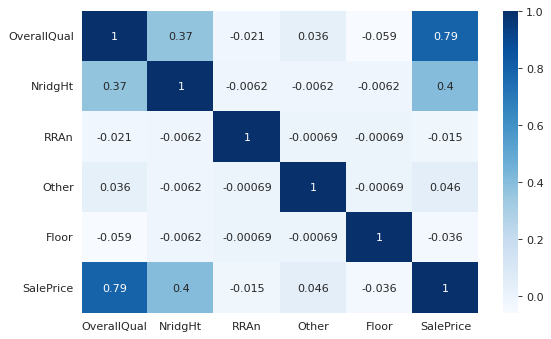

In [ ]:
plt.figure( figsize=( 8,5 ), dpi=80 )
sns.heatmap( X_5best.corr(), cmap='Blues', annot=True )
plt.show()

Não sei dizer porque o código selecionou variáveis com pouca relação com o 'SalePrice', acredito que neste caso deveriam ser escolhidas as 5 que tem maiores relações. Com isso não usaremos essa seleção para continuar com o nosso projeto. No gráfico podemos ver que as 3 últimas não tem relação alguma com a nossa variável alvo.

Podemos ver também que duas delas se relacionam, as duas primeiras, mas acredito que isso não nos diz muita coisa, pois um é a qualidade do material e o acabamento da casa e o outro é um bairro.



Aqui vamos ver a relação de todas as variaveis em relação a nossa variável alvo, "SalePrice", usando o dataset "X" com o tratamento dos valores nulos e todas variáveis numéricas

In [ ]:
X['PoolArea']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1460, dtype: int64

In [ ]:
correlacao = pd.DataFrame({'Nome':[],'Correlação':[]})
for i in range(len(X.columns)):
  correlacao = correlacao.append({'Nome':X.columns[i],'Correlação':np.corrcoef(X.iloc[:,i],y)[1][0]},ignore_index=True)
  print(X.columns[i],":",np.corrcoef(X.iloc[:,i],y)[1][0])

LotFrontage : 0.3349008515405508
LotArea : 0.2638433538714057
OverallQual : 0.7909816005838044
OverallCond : -0.07785589404867803
YearBuilt : 0.5228973328794969
YearRemodAdd : 0.5071009671113864
MasVnrArea : 0.47261449900457475
ExterQual : 0.6826392416562594
ExterCond : 0.018899118482413015
BsmtQual : 0.5852071991725198
BsmtCond : 0.21260715648557924
BsmtExposure : 0.374696221000887
BsmtFinType1 : 0.30490787307063294
BsmtFinSF1 : 0.3864198062421532
BsmtFinType2 : -0.005323160673474955
BsmtFinSF2 : -0.011378121450215127
BsmtUnfSF : 0.21447910554696892
TotalBsmtSF : 0.6135805515591956
HeatingQC : 0.42764870739880406
1stFlrSF : 0.6058521846919147
2ndFlrSF : 0.3193338028320681
LowQualFinSF : -0.025606130000679593
GrLivArea : 0.7086244776126523
BsmtFullBath : 0.2271222331314938
BsmtHalfBath : -0.016844154297359016
FullBath : 0.5606637627484449
HalfBath : 0.2841076755947831
BedroomAbvGr : 0.16821315430073985
KitchenAbvGr : -0.13590737084214122
KitchenQual : 0.6595997207286639
TotRmsAbvGrd : 

In [ ]:
correlacao.sort_values(by=['Correlação'],ascending=False).head(20)

,Nome,Correlação
2,OverallQual,0.790982
22,GrLivArea,0.708624
7,ExterQual,0.682639
29,KitchenQual,0.659600
36,GarageCars,0.640409
37,GarageArea,0.623431
17,TotalBsmtSF,0.613581
19,1stFlrSF,0.605852
9,BsmtQual,0.585207
25,FullBath,0.560664


Podemos ver que temos variaveis diferentes das selecionadas pelo código anterior, isso nos mostra a importancia de conhecer bem os nossos dados. Estas variáveis fazem mais sentido que as selecionadas anteriormente.

Agora vamos criar outros 3 bancos de dados: 
- o Xmanual que pegaramos somente as variáveis que tem relação positiva com a nossa variável alvo.
- X20melhores que será as 20 melhores relações, as 20 mais altas.
- XRFE que fará escolha através do estimador.

In [ ]:
#criando datasets para serem testados
def criardataset(filtro):
  nomecoluna = []
  for i in range(len(filtro)):
    nomecoluna.append(filtro.iloc[i,0]) 
  return nomecoluna 

In [ ]:
#dataset com sem as relações negativas
Xmanual = X[criardataset(correlacao[correlacao['Correlação']>=0])]

In [ ]:
#dataset com as 20 melhores
X20melhores = X[criardataset(correlacao.sort_values(by=['Correlação'],ascending=False).head(20))]

In [ ]:
#dataset com as melhores RFE
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=20)
selector = selector.fit(X, y)
colunas_significantes = selector.get_feature_names_out()
print(colunas_significantes)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,


['x50' 'x51' 'x52' 'x53' 'x54' 'x55' 'x57' 'x58' 'x59' 'x60' 'x61' 'x62'
 'x63' 'x64' 'x73' 'x76' 'x88' 'x89' 'x90' 'x127']


In [ ]:
X_RFE = X.iloc[:,[50,51,52,53,54,55,57,58,59,60,61,62,63,64,73,76,88,89,90,127]]
X_RFE.head()

,60,20,70,50,190,45,120,30,85,80,160,75,180,40,Reg,IR3,Gtl,Mod,Sev,Duplex
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 201 entries, LotFrontage to TenC
dtypes: float64(3), int64(47), uint8(151)
memory usage: 785.7 KB


#6 Decisão do modelo 
(1.0 ponto)
- Dada toda a análise realizada nos pontos anteriores, qual modelo melhor se adequa a este problema? E por quê?

Pelo nosso conhecimento aprendido em aula, acredito que o modelo que mais se encaixa nesse nosso projeto será os de regressão, linear, Ridge, Lasso, ElasticNet e Random Forest, porém tentaremos algumas variações entre eles para tentar encontra os melhores resultados.

O motivo pelo qual escolher os de regressão são pelo fato de trabalharmos com aprendizado de máquina, algoritimos preditivos e supervisionados. Além disso a nossa variável alvo é uma variável númerica contínua.


#7 Modelagem 
(1.0 ponto)
- Divida os dados em teste e treino, construa o seu modelo e teste alterar os parâmetros utilizados por ele.

Aqui nesta parte do trabalho iremos aplicar os medelos já citados a cima, tentaremos com datasets diferentes, será indicado quando estará sendo usado um ou outro.

In [ ]:
#Aplicando os modelos com o X inteiro, todos os dados.
metricas = pd.DataFrame({'Linear Regression':[1, 1]}, index=['R² Score (X)', 'MSE (X)'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.19, random_state=10)
def metricas_X(modelo,nome_modelo):
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  erro = mean_absolute_error(y_test, y_pred)
  metricas[nome_modelo] = [r2,erro]                       

In [ ]:
lr = LinearRegression()
metricas_X(lr,'Linear Regression')

regRidge = Ridge()
metricas_X(regRidge,'Ridge')

regLasso = Lasso()
metricas_X(regLasso,'Lasso')

regElasticNet = ElasticNet()
metricas_X(regElasticNet,'ElasticNet')

rf = RandomForestRegressor()
metricas_X(rf,'Random Forest')

metricas

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

,Linear Regression,Ridge,Lasso,ElasticNet,Random Forest
R² Score (X),0.868639,0.889723,0.883439,0.852505,0.878031
MSE (X),20162.923749,18806.150269,19660.860394,19671.733699,18528.754065


Interssante ver que quase todos os resultados deram muito parecidos, nesse caso o melhor modelo foi o Ridge Regression.

In [ ]:
#Aplicando os modelos com o X inteiro, com a normalização MinMaxScaler.
X_mms = MinMaxScaler().fit_transform(X)
metricas_Xmms = pd.DataFrame({'Linear Regression':[1, 1]}, index=['R² Score (Xmms)', 'MSE (Xmms)'])
X_train, X_test, y_train, y_test = train_test_split(X_mms, y, test_size = 0.19, random_state=10)
def metricas_X(modelo,nome_modelo):
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  erro = mean_absolute_error(y_test, y_pred)
  metricas_Xmms[nome_modelo] = [r2,erro]  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
lr = LinearRegression()
metricas_X(lr,'Linear Regression')

regRidge = Ridge()
metricas_X(regRidge,'Ridge')

regLasso = Lasso()
metricas_X(regLasso,'Lasso')

regElasticNet = ElasticNet()
metricas_X(regElasticNet,'ElasticNet')

rf = RandomForestRegressor()
metricas_X(rf,'Random Forest')

metricas = metricas.append(metricas_Xmms)
metricas

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.010e+11, tolerance: 7.420e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


,Linear Regression,Ridge,Lasso,ElasticNet,Random Forest
R² Score (X),8.686388e-01,0.889723,0.883439,0.852505,0.878031
MSE (X),2.016292e+04,18806.150269,19660.860394,19671.733699,18528.754065
R² Score (Xmms),-2.249674e+22,0.890868,0.883564,0.619731,0.876815
MSE (Xmms),1.018827e+15,18576.997074,19645.847879,33633.940157,18454.609388


Interessante ver q o modelo de Regressão linear não se comportou como deveria, porém o Ridge Regression teve uma ligeira melhora, sendo até o momento o melhor modelo apresentado.

Agora tentaremos aplicar no PCA no nosso dataset X para ver se os modelos reagem bem.

In [ ]:
#PCA
from sklearn.decomposition import PCA

In [ ]:
pca = PCA( n_components=20 )
pca.fit(X)
pca.explained_variance_ratio_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([9.82827209e-01, 5.08460440e-03, 3.38471191e-03, 2.77609295e-03,
       2.41015372e-03, 1.96553875e-03, 4.99415495e-04, 3.06760404e-04,
       2.57205977e-04, 1.82967531e-04, 1.38282862e-04, 4.09360399e-05,
       3.32422282e-05, 3.01902424e-05, 2.75312558e-05, 1.49847500e-05,
       8.38360822e-06, 6.06463140e-06, 3.51300146e-06, 2.01040624e-06])

In [ ]:
pca = PCA( n_components=100)
pca.fit(X)
X_pca = pca.fit_transform( X )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# Modelo com o X normalizado pelo PCA
metricasPCA = pd.DataFrame({'Linear Regression':[1, 1]}, index=['R² Score (PCA)', 'MSE (PCA)'])
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state=10)
def metricas_X(modelo,nome_modelo):
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  erro = mean_absolute_error(y_test, y_pred)
  metricasPCA[nome_modelo] = [r2,erro]   
 

In [ ]:
lr = LinearRegression()
metricas_X(lr,'Linear Regression')

regRidge = Ridge()
metricas_X(regRidge,'Ridge')

regLasso = Lasso()
metricas_X(regLasso,'Lasso')

regElasticNet = ElasticNet()
metricas_X(regElasticNet,'ElasticNet')

rf = RandomForestRegressor()
metricas_X(rf,'Random Forest')

metricas = metricas.append(metricasPCA)
metricas

,Linear Regression,Ridge,Lasso,ElasticNet,Random Forest
R² Score (X),8.686388e-01,0.889723,0.883439,0.852505,0.878031
MSE (X),2.016292e+04,18806.150269,19660.860394,19671.733699,18528.754065
R² Score (Xmms),-2.249674e+22,0.890868,0.883564,0.619731,0.876815
MSE (Xmms),1.018827e+15,18576.997074,19645.847879,33633.940157,18454.609388
R² Score (PCA),8.662724e-01,0.866699,0.866355,0.850691,0.805914
MSE (PCA),2.045150e+04,20421.284513,20443.478462,20158.240253,23091.549555


Como o PCA ele reduz o número de colunas, faz com que o nosso problema seja menos custoso, em dataset maiores, com mais dados, pelo fato de os resultados serem muito parecidos, talvez seja mais vantajoso. Nesse nosso caso teriamos que usar quase todas as colunas do PCA também para alcançar os resultado obtidos com o X original, então nesse caso optaremos por continuar com o X.

In [ ]:
# Model com o X manual, o qual tem só valores de relação com o Y posivas.
metricas_Xmanual = pd.DataFrame({'Linear Regression':[1, 1]}, index=['R² Score (X manual)', 'MSE (X manual)' ])
X_train, X_test, y_train, y_test = train_test_split(Xmanual, y, test_size = 0.2, random_state=10)
def metricas_X(modelo,nome_modelo):
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  erro = mean_absolute_error(y_test, y_pred)
  metricas_Xmanual[nome_modelo] = [r2,erro]   

In [ ]:
lr = LinearRegression()
metricas_X(lr,'Linear Regression')

regRidge = Ridge()
metricas_X(regRidge,'Ridge')

regLasso = Lasso()
metricas_X(regLasso,'Lasso')

regElasticNet = ElasticNet()
metricas_X(regElasticNet,'ElasticNet')

rf = RandomForestRegressor()
metricas_X(rf,'Random Forest')

metricas = metricas.append(metricas_Xmanual)
metricas

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

,Linear Regression,Ridge,Lasso,ElasticNet,Random Forest
R² Score (X),8.686388e-01,0.889723,0.883439,0.852505,0.878031
MSE (X),2.016292e+04,18806.150269,19660.860394,19671.733699,18528.754065
R² Score (Xmms),-2.249674e+22,0.890868,0.883564,0.619731,0.876815
MSE (Xmms),1.018827e+15,18576.997074,19645.847879,33633.940157,18454.609388
R² Score (PCA),8.662724e-01,0.866699,0.866355,0.850691,0.805914
MSE (PCA),2.045150e+04,20421.284513,20443.478462,20158.240253,23091.549555
R² Score (X manual),8.716891e-01,0.875077,0.872253,0.845823,0.873778
MSE (X manual),2.024512e+04,19970.581716,20207.334330,20574.252652,18825.776027


Tivemos valores muito bons também, se comparado ao original, teve muita pouca perda e estamos trabalhando com menos colunas, isso facilita e é menos custoso.

In [ ]:
# Modelos com o X 20 melhores variáveis
metricas_X20melhores = pd.DataFrame({'Linear Regression':[1, 1]}, index=['R² Score (X20)', 'MSE (X20)'])
X_train, X_test, y_train, y_test = train_test_split(X20melhores, y, test_size = 0.2, random_state=10)
def metricas_X(modelo,nome_modelo):
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  erro = mean_absolute_error(y_test, y_pred)
  metricas_X20melhores[nome_modelo] = [r2,erro] 

In [ ]:
lr = LinearRegression()
metricas_X(lr,'Linear Regression')

regRidge = Ridge()
metricas_X(regRidge,'Ridge')

regLasso = Lasso()
metricas_X(regLasso,'Lasso')

regElasticNet = ElasticNet()
metricas_X(regElasticNet,'ElasticNet')

rf = RandomForestRegressor()
metricas_X(rf,'Random Forest')

metricas = metricas.append(metricas_X20melhores)
metricas

,Linear Regression,Ridge,Lasso,ElasticNet,Random Forest
R² Score (X),8.686388e-01,0.889723,0.883439,0.852505,0.878031
MSE (X),2.016292e+04,18806.150269,19660.860394,19671.733699,18528.754065
R² Score (Xmms),-2.249674e+22,0.890868,0.883564,0.619731,0.876815
MSE (Xmms),1.018827e+15,18576.997074,19645.847879,33633.940157,18454.609388
R² Score (PCA),8.662724e-01,0.866699,0.866355,0.850691,0.805914
MSE (PCA),2.045150e+04,20421.284513,20443.478462,20158.240253,23091.549555
R² Score (X manual),8.716891e-01,0.875077,0.872253,0.845823,0.873778
MSE (X manual),2.024512e+04,19970.581716,20207.334330,20574.252652,18825.776027
R² Score (X20),8.358126e-01,0.835922,0.835825,0.832511,0.868121
MSE (X20),2.273343e+04,22714.509087,22731.532079,21923.566465,19230.174389


Aqui nesse caso já tivemos uma perda maior, acredito que precisamos aumentar a quantidade de variáveis para se aproximar dos resultados obtidos nos outros testes.

In [ ]:
# modelos com o Xusando RFE
metricas_XRFE = pd.DataFrame({'Linear Regression':[1, 1]}, index=['R² Score (RFE)', 'MSE (RFE)'])
X_train, X_test, y_train, y_test = train_test_split(X_RFE, y, test_size = 0.2, random_state=10)
def metricas_X(modelo,nome_modelo):
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  erro = mean_absolute_error(y_test, y_pred)
  metricas_XRFE[nome_modelo] = [r2,erro] 

In [ ]:
lr = LinearRegression()
metricas_X(lr,'Linear Regression')

regRidge = Ridge()
metricas_X(regRidge,'Ridge')

regLasso = Lasso()
metricas_X(regLasso,'Lasso')

regElasticNet = ElasticNet()
metricas_X(regElasticNet,'ElasticNet')

rf = RandomForestRegressor()
metricas_X(rf,'Random Forest')

metricas = metricas.append(metricas_XRFE)
metricas

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

,Linear Regression,Ridge,Lasso,ElasticNet,Random Forest
R² Score (X),8.686388e-01,0.889723,0.883439,0.852505,0.878031
MSE (X),2.016292e+04,18806.150269,19660.860394,19671.733699,18528.754065
R² Score (Xmms),-2.249674e+22,0.890868,0.883564,0.619731,0.876815
MSE (Xmms),1.018827e+15,18576.997074,19645.847879,33633.940157,18454.609388
R² Score (PCA),8.662724e-01,0.866699,0.866355,0.850691,0.805914
MSE (PCA),2.045150e+04,20421.284513,20443.478462,20158.240253,23091.549555
R² Score (X manual),8.716891e-01,0.875077,0.872253,0.845823,0.873778
MSE (X manual),2.024512e+04,19970.581716,20207.334330,20574.252652,18825.776027
R² Score (X20),8.358126e-01,0.835922,0.835825,0.832511,0.868121
MSE (X20),2.273343e+04,22714.509087,22731.532079,21923.566465,19230.174389


Não entendo porque o "estimatior" selecionou as variáveis em questão, não fazem muito sentido, o resultado esta nas métricas obtidas, de longe é o pior modelo que testamos.

#8 Histórico 
(1.0 pontos)
- Preencha a tabela abaixo com cada teste realizado com seu modelo. Não se preocupe caso voce mude de ideia sobre qual modelo testar, mas não deixe de testá-lo exaustivamente e, caso precise, retorne para o passo de criação e seleção de características.

In [ ]:
metricas

,Linear Regression,Ridge,Lasso,ElasticNet,Random Forest
R² Score (X),8.686388e-01,0.889723,0.883439,0.852505,0.878031
MSE (X),2.016292e+04,18806.150269,19660.860394,19671.733699,18528.754065
R² Score (Xmms),-2.249674e+22,0.890868,0.883564,0.619731,0.876815
MSE (Xmms),1.018827e+15,18576.997074,19645.847879,33633.940157,18454.609388
R² Score (PCA),8.662724e-01,0.866699,0.866355,0.850691,0.805914
MSE (PCA),2.045150e+04,20421.284513,20443.478462,20158.240253,23091.549555
R² Score (X manual),8.716891e-01,0.875077,0.872253,0.845823,0.873778
MSE (X manual),2.024512e+04,19970.581716,20207.334330,20574.252652,18825.776027
R² Score (X20),8.358126e-01,0.835922,0.835825,0.832511,0.868121
MSE (X20),2.273343e+04,22714.509087,22731.532079,21923.566465,19230.174389


Aqui temos o nosso resultado final, com a maioria dos testes feitos, os quais julguei mais interessante apresentar. Como visto no projeto, nos questionamos, quanto ao fato de tirar algumas variáveis do dataset, acabamos que chegamos a conclusão que o melhor modelo foi o apresentado pelo X completo, com todas as variáveis, porem com a normalização de MinMaxScaler.

Claro que tudo depende dos dados que estamos trabalhando, como nesse nosso caso é um dataset com muitas variáveis, porém poucos dados, vale a pena continuarmos usando o nosso X inteiro, o custo não é relevante neste nosso projeto. Em projeto futuros, onde o custo será um dos principais empecilhos com toda a certeza iremos talvez trabalhar com outras variáveis dependendo de seus resultados.

#9 Resultado 
(2.0 pontos)
- Reúna os seus achados, os valores das métricas do seu melhor modelo obtido e o melhor conjunto de variáveis. Escreva abaixo um relatório que seria enviado para uma diretoria de uma empresa sobre seu trabalho.

- Neste projeto o objetivo é encontrar o melhor modelo para predizer o valor de venda de casas, para isso pegamos uma base de dados com 81 variáveis e dados de 1460 casas diferentes.
- No primeiro momento foi visto que o banco de dados tinha muitos problemas que deveriam ser corrigidos, valores nulos que deveriam ser substituídos por outros para que não tivesse interferências nos resultados e também muitas colunas com strings, o que dificulta o trabalho de muitos modelos, então foi necessário transformá-los em númericos.


Deste modo chegamos a divisão das variáveis em X e y:

In [ ]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Detchd,BuiltIn,CarPort,NA,Basment,2Types,P,Gar2,Othr,TenC
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,1,0,0,1,0,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 201 entries, LotFrontage to TenC
dtypes: float64(3), int64(47), uint8(151)
memory usage: 785.7 KB


Podemos ver que não temos mais nenhum String em nossa base de dados, o que nos habilitou realizar o testes com os modelos.

Aqui podemos ver a variável que tem mais relação com a Sale Price, podemos ver que os pontos tendem a seguir a linha central.

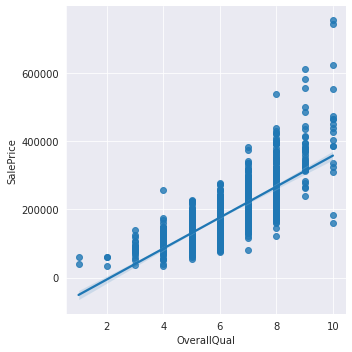

In [ ]:
g = sns.lmplot(x="OverallQual", y="SalePrice", data=df)

Aqui vamos olhar a nossa variável alvo, y, que é o preço das casas, vamos plotar um gráfico para vermos melhor.

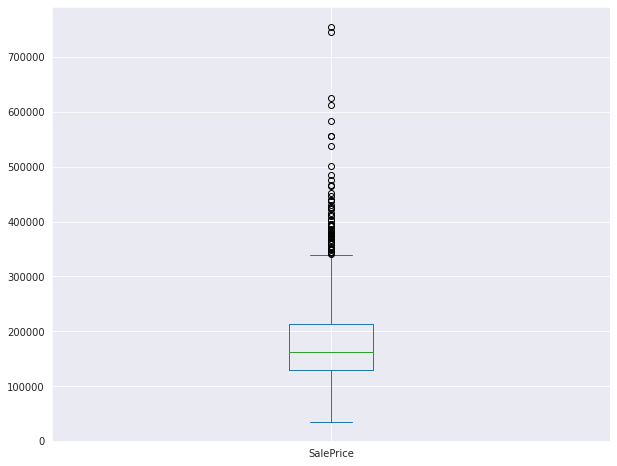

In [ ]:
plt.figure(figsize=(10,8))
y.plot.box()

Com esse gráfico temos a noção de como os pontos estão distribuidos em relação a mediana, a maoria das casas se concentram em 100 mil e 200 mil dolares, mas temos casas passando de 700 mil.

Aqui, agora vamos rodar o melhor modelo encontrado:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_mms, y, test_size = 0.19, random_state=10)
regRidge = Ridge()
regRidge.fit(X_train, y_train)
y_pred = regRidge.predict(X_test)

r2 = r2_score(y_test, y_pred)
erro = mean_absolute_error(y_test, y_pred)
print('R² Score =', r2,'e MSE = ', erro) 

R² Score = 0.8908680051462463 e MSE =  18576.997073816743


O melhor modelo encontrado para a nossa base de dados foi RIDGE REGRESSION, foi o que obteve o maior R² Score e o menor Mean Absolute Error 

Deste modo, com o modelo escolhido e os resultados apresentados, poderíamos partir para a parte da predição. Com todas essas variáveis poderiamos chegar a quase 90% de certeza do valor de venda de uma casa.

Claro que, como dito durante o trabalho, temos que levar em consideração o local de onde foram colhidos estes dados, com toda a certeza se fosse aplicar este modelo aqui no Brasil teriamos discrepâncias, deveriamos trabalhar variável a variável e adaptar ela ao nosso hambiente. Isso tudo seria possível com ajuda de especialistas, mas toda a certeza é possível predizer valores de casas em qualquer lugar do mundo.

E para fechar esse nosso trabalho, como já dito também anteriomente, só escolhemos trabalhar com todas as variáveis por não ser uma base de dados grande, com toda certeza trabalhar com 201 colunas e um quantidade de dados absurda iria ser muito custoso. A ideia então seria tentar diminui-lás para chegar num resultado razoável, onde o custo e o resultado se equilibrassem.